## Modelos El Salvador - EFX F3 ES 020 022 Primera obs - MI-PE
#### Objetivo:		Primeras Observaciones
#### Fecha modificación: 24/01/2023
#### Autor:			Jacinta Diestre
#### Contacto:		jacinta.diestre@gmail.com

In [44]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn import metrics
import random
from sklearn.preprocessing import StandardScaler
%matplotlib inline  
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib as mpl
import matplotlib.ticker as mtick
from scipy.stats import ttest_ind
from matplotlib_venn import venn2, venn2, venn3, venn3_circles

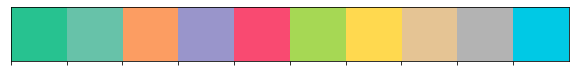

In [2]:
paleta = ['#27c290', '#67c2a9', '#fc9d62', 
          '#9995cb', '#f94a71', '#a6d854', 
          '#ffd94f', '#e5c494', '#b3b3b3', '#00c9e5']
sns.palplot(sns.color_palette(paleta))
tamanio = {'MI': '#386085' , 'PE':"#27c290", 
           'ME': "#9995cb", 'GE':"#f94a71",'GO': "#fc9d62"}
tamanio1 = {'MI-PE': "#27c290", 'ME': "#9995cb",
            'GE':"#f94a71",'GO': "#fc9d62"}


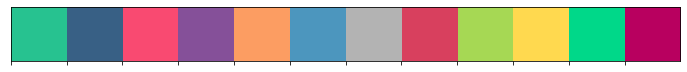

In [3]:
paleta1 = ['#27c290', '#386085', '#f94a71', '#855099', 
           '#fc9d62', '#4C96BE', '#b3b3b3', 
          '#D8405E', '#a6d854', 
          '#ffd94f', '#00d889','#B8005F']
sns.palplot(sns.color_palette(paleta1))



In [4]:
miss = {'Empresa con Tamaño': "#27c290", 
        'Empresa sin Tamaño': "#4C96BE"}


In [5]:
random.seed(333)

In [6]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [7]:
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [8]:
global pais
# pais = "AR"
# pais = "CH"
# pais = "CR"
# pais = "EC"
pais = "ES"
# pais = "HO"
# pais = "PE"
# pais = "PR"
# pais = "UR" 

In [9]:
global dir 
dir = "/Users/jacinta/Desktop/EFX F3/"+str(pais)+"/"
global data 
data = str(dir)+"data/"
data_raw = str(data)+"raw/"
data_int = str(data)+"int/"

In [10]:
print(data_int)

/Users/jacinta/Desktop/EFX F3/ES/data/int/


In [11]:
base = pd.read_stata(str(data_int)+'EFX F3 ES 020 010 Primera obs.dta') 
base.tail()

,idpersona,referencia_unica,id_acreedor,periodo_informacion,periodo_infor,idtipo_persona,sexo,fecha_nacimiento,tamanio_empresa,sector_empresa,...,empresa,tamano,sin_tamanio,datasource,tipocred,tipopres,riesgo,otorgante,regul,entidad
11338440,99999,425129,5000,202107,202107,1,F,2051978,,,...,0.00,GE,1.00,DEUTAR,Tarjeta de Credito,TARJETA DE CREDITO,NaN,,1.00,BANCO
11338441,99999,431064,4550,201902,201902,1,F,2051978,,,...,0.00,GE,1.00,DEUTAR,Tarjeta de Credito,TARJETA DE CREDITO,A1,,1.00,BANCO
11338442,99999,431064,5000,202009,202009,1,F,2051978,,,...,0.00,GE,1.00,DEUTAR,Tarjeta de Credito,TARJETA DE CREDITO,NaN,,1.00,BANCO
11338443,99999,611081,4550,201811,201811,1,F,2051978,,,...,0.00,GE,1.00,DEUBAN,Consumo,CREDITO DECRECIENTE,A1,,1.00,BANCO
11338444,99999,903061,4550,201904,201904,1,F,2051978,,,...,0.00,GE,1.00,DEUBAN,Consumo,CREDITO DECRECIENTE,A1,,1.00,BANCO


In [12]:
base.columns

Index(['idpersona', 'referencia_unica', 'id_acreedor', 'periodo_informacion',
       'periodo_infor', 'idtipo_persona', 'sexo', 'fecha_nacimiento',
       'tamanio_empresa', 'sector_empresa', 'monto', 'saldo', 'plazo',
       'fecha_otorgamiento', 'fecha_cancelacion', 'saldo_mora', 'cuota',
       'dias_mora', 'fech_ismc', 'fech_ismi', 'tasa_interes', 'datasources',
       'tipo_credito', 'tipo_prestamo', 'estado_credito', 'tipo_garantia',
       'calificacion_riesgo', 'codi_dest', 'otorgante_publico_privado',
       'tipo_entidad', 'ubicacion_geogrfica', 'ID_UNICO_CRED_str', 'year',
       'month', 'fecha_vencimiento', 'fecha_otorgamiento_td', 'fecha_mora',
       'n', 'mora', 'mora_id', 'cuenta_meses', 'agno_otor', 'lgmonto',
       'tasa_inte', 'tasa_inte2', 'fecha_otorgamiento_1', 'base_tasa', 'mujer',
       'empresa', 'tamano', 'sin_tamanio', 'datasource', 'tipocred',
       'tipopres', 'riesgo', 'otorgante', 'regul', 'entidad'],
      dtype='object')

In [13]:
base['idtipo_persona'].value_counts()

1    11279010
2       59435
Name: idtipo_persona, dtype: int64

In [14]:
print('La base de datos de observaciones únicas tiene ' + str(len(base)) + ' datos')
print('La tabla que sigue a continuación muestra la cantidad de observaciones por fuente de datos')
counts = base['datasources'].value_counts()
percs = base['datasources'].value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

La base de datos de observaciones únicas tiene 11338445 datos
La tabla que sigue a continuación muestra la cantidad de observaciones por fuente de datos


,count,percentage
DEUBAN,5193579,0.46
DEUCOM,4519812,0.40
DEUTAR,1625054,0.14


In [15]:
base['monto'].describe()

count      11,338,445.00
mean            5,538.96
std         3,307,250.58
min                 0.01
25%               179.00
50%               514.20
75%             2,000.00
max     6,000,001,039.00
Name: monto, dtype: float64

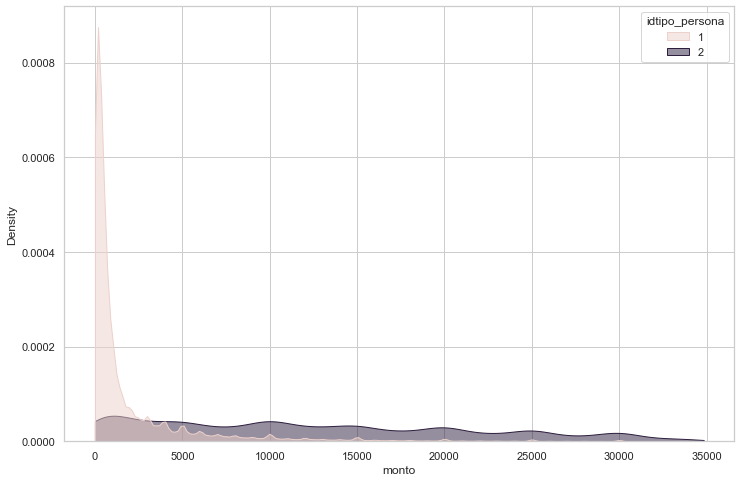

In [16]:
plt.rcParams["figure.figsize"]=12,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")
# Without transparency
sns.kdeplot(data= base.loc[base['monto']<base['monto'].quantile(.99)], 
            x='monto', hue='idtipo_persona', cut=0, fill=True, 
            common_norm=False, alpha=0.5)
plt.show()

In [17]:
montos = ['monto','saldo', 'cuota', 'saldo_mora']
for col in montos: 
    base[str(col)] = base[str(col)].apply(lambda x: np.nan if x < 0 else x)
    base['ln'+str(col)] = np.log(base[str(col)]).replace(0, np.nan)


In [18]:
base1 = base.loc[base['idtipo_persona']==1]
base2 = base.loc[base['idtipo_persona']==2]

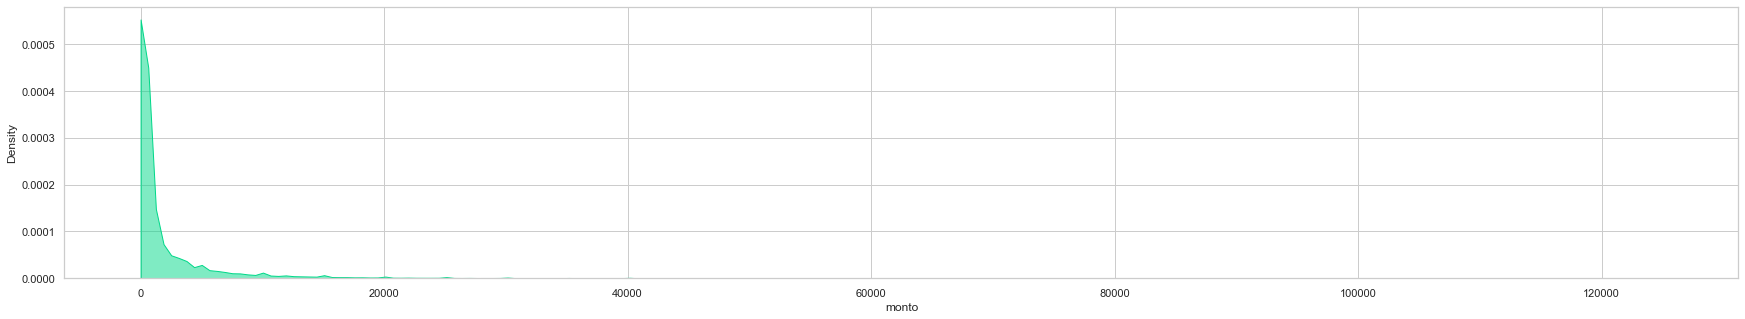

In [19]:
plt.rcParams["figure.figsize"]=30,5
# set seaborn whitegrid theme
sns.set(style="whitegrid")
# Without transparency
sns.kdeplot(data= base1.loc[base1['monto']<base1['monto'].quantile(.999)],
            x='monto', alpha=0.5, fill=True, color='#00d889',cut=0)
plt.show()

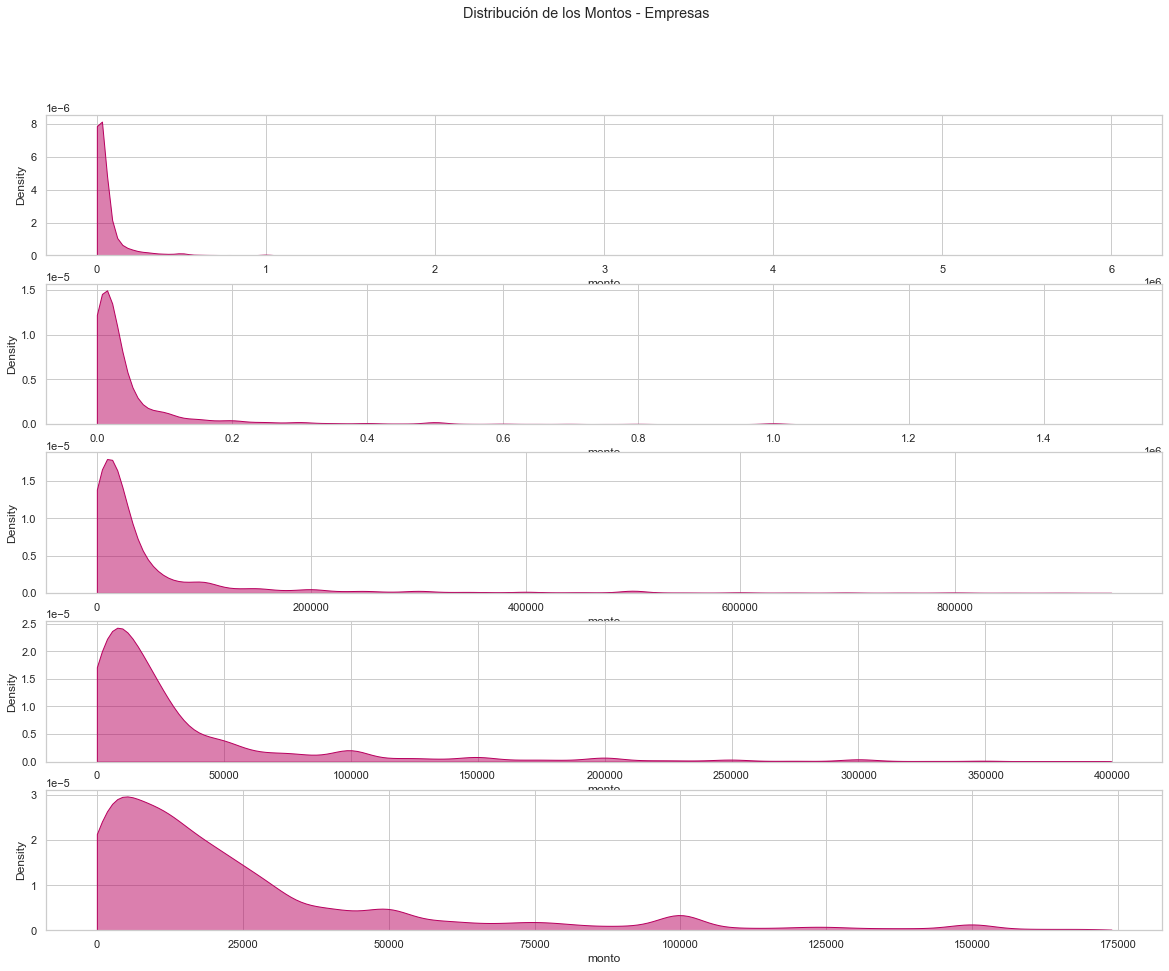

In [20]:
fig, axes = plt.subplots(5, 1, figsize=(20, 15))
fig.suptitle('Distribución de los Montos - Empresas')

sns.kdeplot(ax=axes[0],data= base2.loc[base2['monto']<base2['monto'].quantile(.999)],
            x='monto', alpha=0.5, fill=True, cut=0, color='#B8005F')
sns.kdeplot(ax=axes[1],data= base2.loc[base2['monto']<base2['monto'].quantile(.99)],
            x='monto', alpha=0.5, fill=True, cut=0, color='#B8005F')
sns.kdeplot(ax=axes[2],data= base2.loc[base2['monto']<base2['monto'].quantile(.98)],
            x='monto', alpha=0.5, fill=True, cut=0, color='#B8005F')
sns.kdeplot(ax=axes[3],data= base2.loc[base2['monto']<base2['monto'].quantile(.95)],
            x='monto', alpha=0.5, fill=True, cut=0, color='#B8005F')
sns.kdeplot(ax=axes[4],data= base2.loc[base2['monto']<base2['monto'].quantile(.9)],
            x='monto', alpha=0.5, fill=True, cut=0, color='#B8005F')
plt.show()


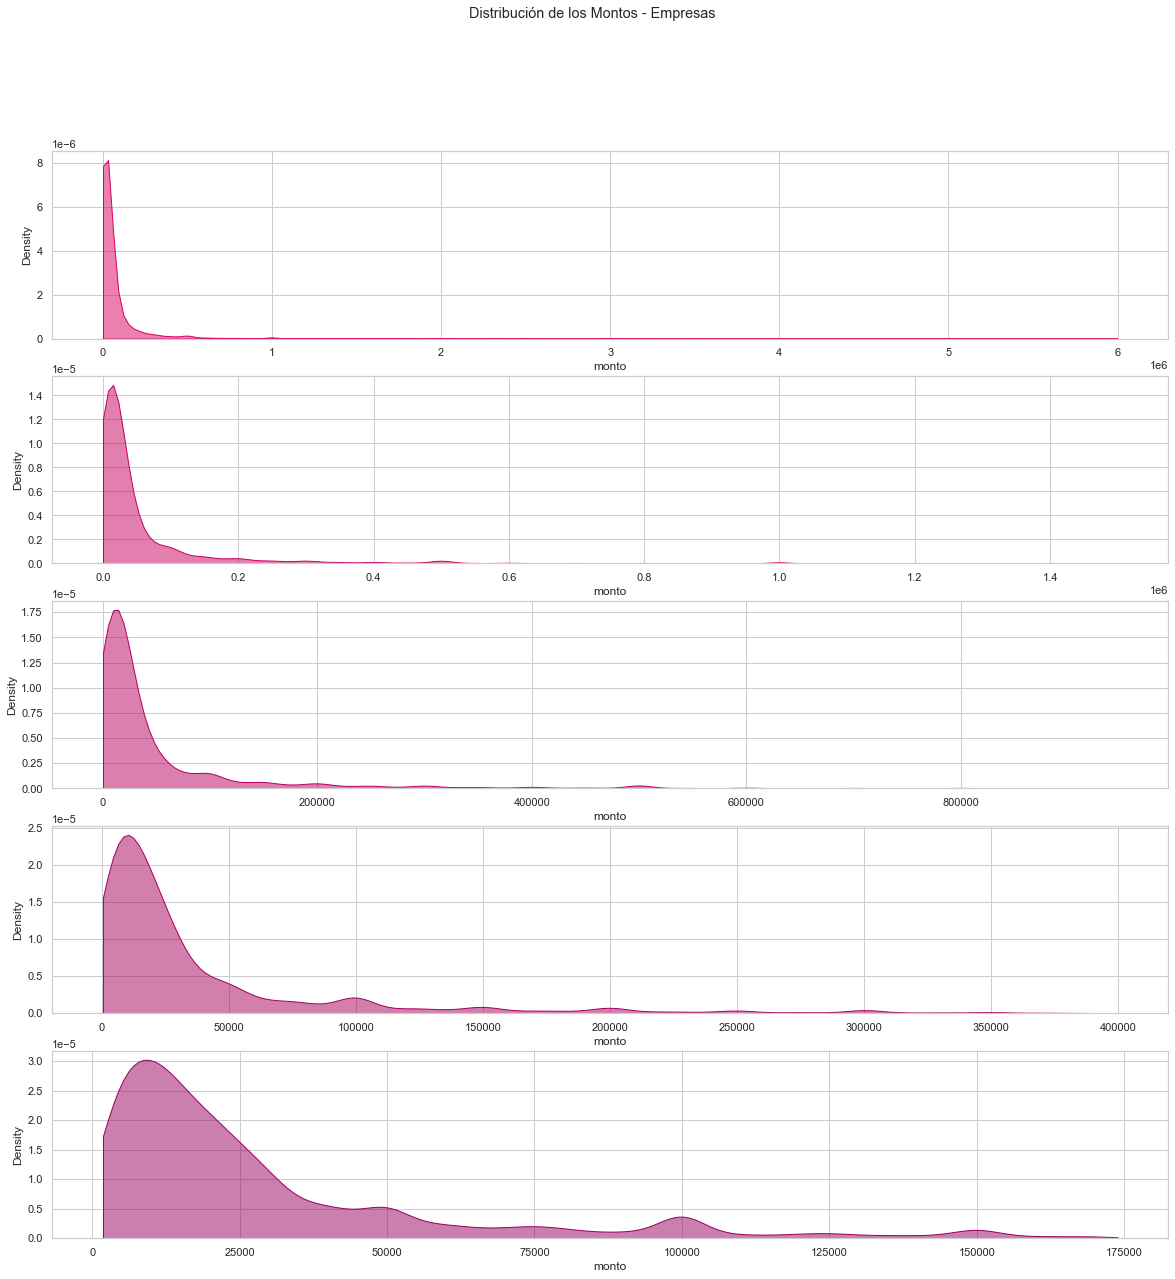

In [21]:
fig, axes = plt.subplots(5, 1, figsize=(20, 20))
fig.suptitle('Distribución de los Montos - Empresas')

sns.kdeplot(ax=axes[0],
            data= base2.loc[(base2['monto']<base2['monto'].quantile(.999))
                           & (base2['monto']>base2['monto'].quantile(.001))],
            x='monto', alpha=0.5, fill=True, cut=0, color='#D8005F')

sns.kdeplot(ax=axes[1],
            data= base2.loc[(base2['monto']<base2['monto'].quantile(.99))
                           & (base2['monto']>base2['monto'].quantile(.01))],
            x='monto', alpha=0.5, fill=True, cut=0, color='#C8005F')
sns.kdeplot(ax=axes[2],
            data= base2.loc[(base2['monto']<base2['monto'].quantile(.98))
                           & (base2['monto']>base2['monto'].quantile(.02))],
            x='monto', alpha=0.5, fill=True, cut=0, color='#B8005F')
sns.kdeplot(ax=axes[3],
            data= base2.loc[(base2['monto']<base2['monto'].quantile(.95))
                           & (base2['monto']>base2['monto'].quantile(.05))],
            x='monto', alpha=0.5, fill=True, cut=0, color='#A8005F')
sns.kdeplot(ax=axes[4],
            data= base2.loc[(base2['monto']<base2['monto'].quantile(.9))
                           & (base2['monto']>base2['monto'].quantile(.1))],
            x='monto', alpha=0.5, fill=True, cut=0, color='#98005F')
plt.show()

Comercial             28933
Produccion            26234
Tarjeta de Credito     2394
Consumo                 517
Hipotecario               6
Name: tipo_credito, dtype: int64

In [27]:
print(base2['monto'].quantile(.995))
print(base2['monto'].quantile(.0175))

2400000.0
60.0


In [28]:
base2_ = base2
base2 = base2.loc[(base2['monto']<base2['monto'].quantile(.995)) &
                 (base2['monto']>base2['monto'].quantile(.0175))]

In [29]:
base2.monto.describe()

count      58,084.00
mean       76,577.90
std       204,538.89
min            60.23
25%         8,000.00
50%        18,990.00
75%        50,000.00
max     2,385,000.00
Name: monto, dtype: float64

In [30]:
base2['tamanio_miss'] = np.where(base2['tamanio_empresa']=='', 
                                'Empresa sin Tamaño', 'Empresa con Tamaño')

In [31]:
base2['tamanio_miss'].value_counts()

Empresa sin Tamaño    48056
Empresa con Tamaño    10028
Name: tamanio_miss, dtype: int64

Corto las colas de la base, dejando fuera un 0,1% de los datos más altos y de los más bajos condicional al tipo de ID persona

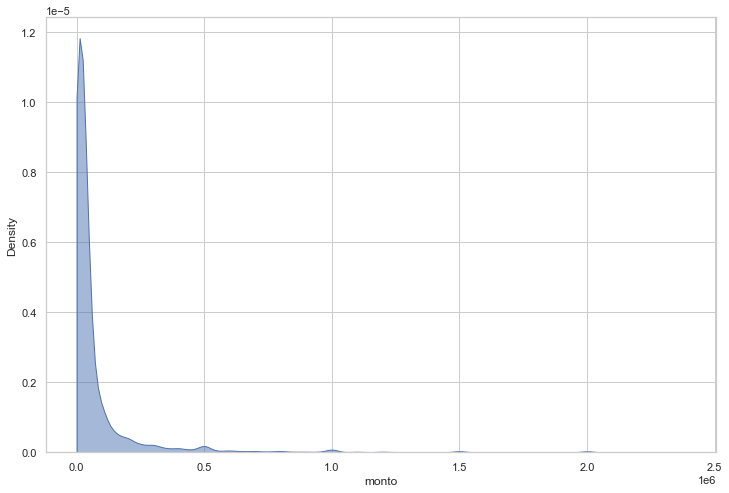

In [32]:
plt.rcParams["figure.figsize"]=12,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")
# Without transparency
sns.kdeplot(data= base2, cut=0,
            x='monto', fill=True, common_norm=False, alpha=0.5)
plt.show()

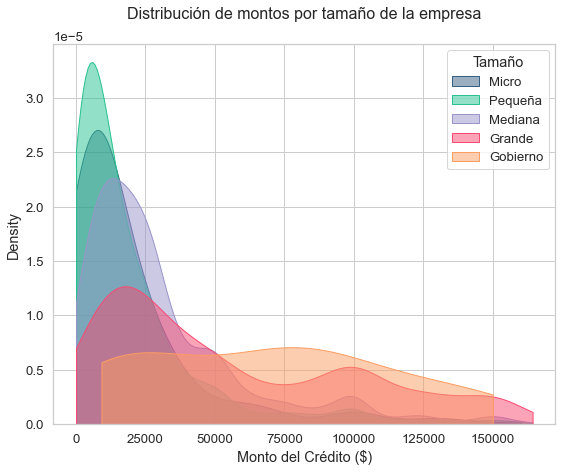

In [33]:
plt.rcParams["figure.figsize"]=9,7
# set seaborn whitegrid theme
sns.set(style="whitegrid", font_scale=1.2)
# Without transparency
plt.title('Distribución de montos por tamaño de la empresa', y=1.05, fontsize = 16)
plt.xlabel('Monto del Crédito ($)')

hue = ['MI', 'PE','ME', 'GE', 'GO']
color_hue=  ["#386085","#27c290","#9995cb", "#f94a71", "#fc9d62"]
for x,color in zip(hue,color_hue):
    sns.kdeplot(data= base2.loc[(base2['monto']<base2['monto'].quantile(.9)) &
                           (base2['tamanio_empresa']==str(x))], 
                x='monto', cut=0, fill=True, common_norm=False, 
            alpha=0.5, color=color)
plt.legend(title='Tamaño', labels=['Micro', 'Pequeña',
                                   'Mediana', 'Grande', 'Gobierno'])
plt.show()


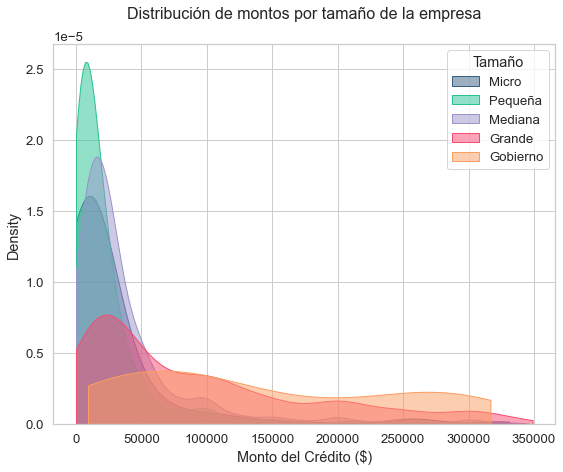

In [34]:
plt.rcParams["figure.figsize"]=9,7
# set seaborn whitegrid theme
sns.set(style="whitegrid", font_scale=1.2)
# Without transparency
plt.title('Distribución de montos por tamaño de la empresa', y=1.05, fontsize = 16)
plt.xlabel('Monto del Crédito ($)')

hue = ['MI', 'PE','ME', 'GE', 'GO']
color_hue=  ["#386085","#27c290","#9995cb", "#f94a71", "#fc9d62"]
for x,color in zip(hue,color_hue):
    sns.kdeplot(data= base2.loc[(base2['monto']<base2['monto'].quantile(.95)) &
                           (base2['tamanio_empresa']==str(x))], 
                x='monto', cut=0, fill=True, common_norm=False, 
            alpha=0.5, color=color)
plt.legend(title='Tamaño', labels=['Micro', 'Pequeña',
                                   'Mediana', 'Grande', 'Gobierno'])
plt.show()


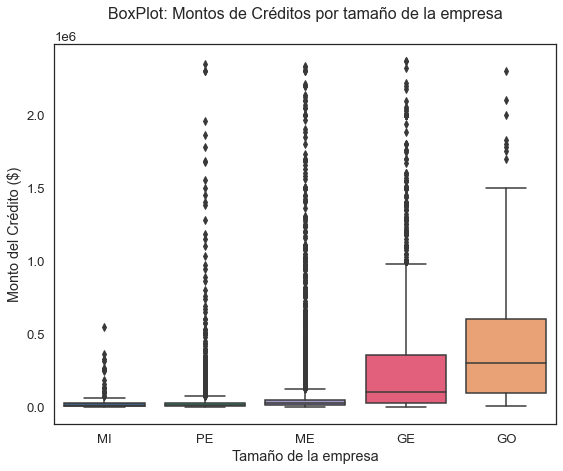

In [35]:
sns.set(style='white', font_scale=1.2)

sns.boxplot(data=base2.loc[base2['tamanio_empresa']!=''],
            x='tamanio_empresa', y='monto', whis=2, 
            order=['MI', 'PE', 'ME', 'GE', 'GO'],palette=tamanio)

plt.title('BoxPlot: Montos de Créditos por tamaño de la empresa', y=1.05, fontsize = 16)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')

plt.show()

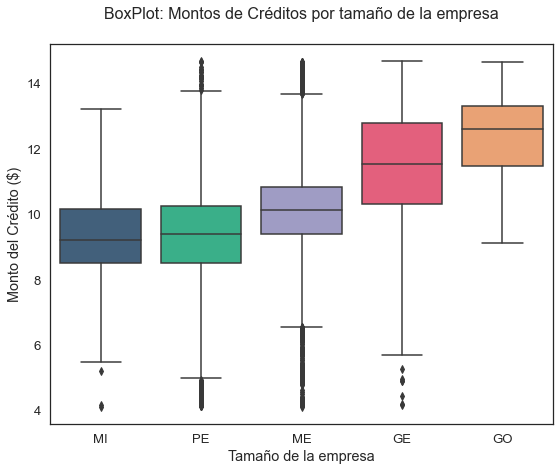

In [36]:
sns.set(style='white', font_scale=1.2)

sns.boxplot(data=base2.loc[base2['tamanio_empresa']!=''],
            x='tamanio_empresa', y='lnmonto', whis=2, 
            order=['MI', 'PE', 'ME', 'GE', 'GO'],palette=tamanio)

plt.title('BoxPlot: Montos de Créditos por tamaño de la empresa', y=1.05, fontsize = 16)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')

plt.show()

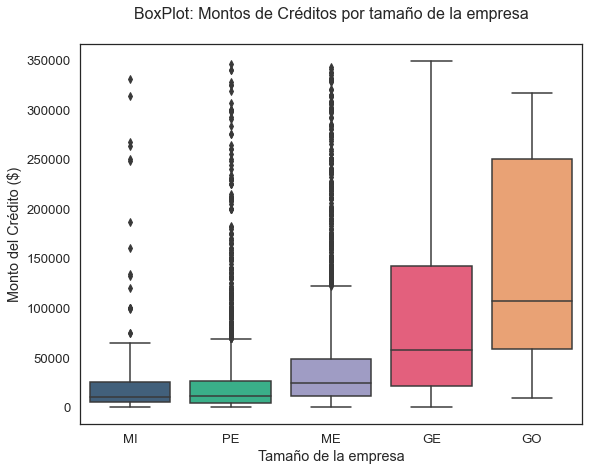

In [37]:
sns.set(style='white', font_scale=1.2)

sns.boxplot(data=base2.loc[(base2['monto']<base2['monto'].quantile(.95)) &
                           (base2['tamanio_empresa']!='')],
            x='tamanio_empresa', y='monto', whis=2, 
            order=['MI', 'PE', 'ME', 'GE', 'GO'],palette=tamanio)

plt.title('BoxPlot: Montos de Créditos por tamaño de la empresa', y=1.05, fontsize = 16)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')

plt.show()

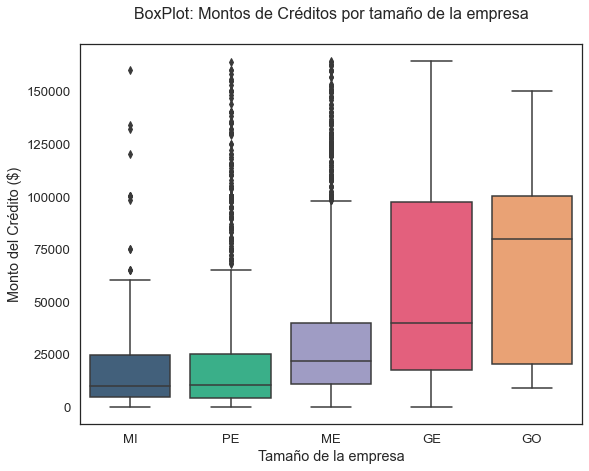

In [38]:
sns.set(style='white', font_scale=1.2)

sns.boxplot(data=base2.loc[(base2['monto']<base2['monto'].quantile(.9)) &
                           (base2['tamanio_empresa']!='')],
            x='tamanio_empresa', y='monto', whis=2, 
            order=['MI', 'PE', 'ME', 'GE', 'GO'],palette=tamanio)

plt.title('BoxPlot: Montos de Créditos por tamaño de la empresa', y=1.05, fontsize = 16)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')

plt.show()

In [39]:
base2['tamanio_empresa2'] = base2['tamanio_empresa']
base2['tamanio_empresa2'] = np.where((base2['tamanio_empresa2']=='MI') |
                                    (base2['tamanio_empresa2']=='PE'), 'MI-PE', 
                                    base2['tamanio_empresa2'])

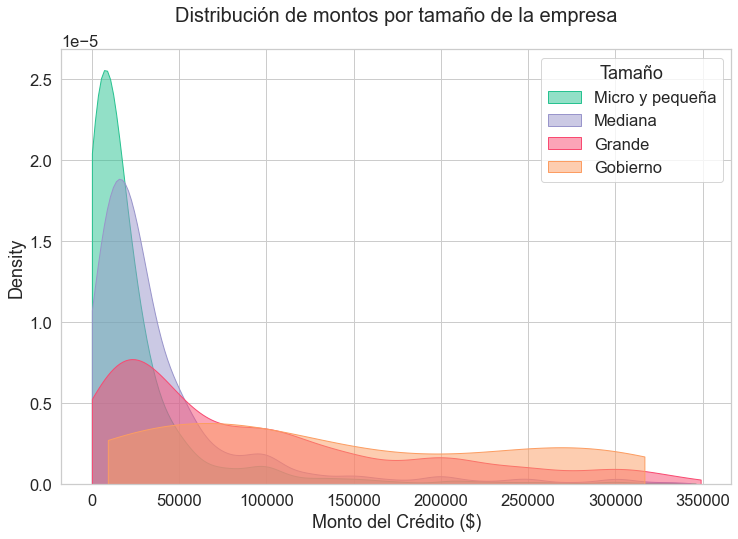

In [40]:
plt.rcParams["figure.figsize"]=12,8
# set seaborn whitegrid theme
sns.set(style="whitegrid", font_scale=1.5)
# Without transparency
plt.title('Distribución de montos por tamaño de la empresa', y=1.05, fontsize = 20)
plt.xlabel('Monto del Crédito ($)')

hue = ['MI-PE', 'ME', 'GE', 'GO']
color_hue=  ["#27c290","#9995cb", "#f94a71", "#fc9d62"]
for x,color in zip(hue,color_hue):
    sns.kdeplot(data= base2.loc[(base2['monto']<base2['monto'].quantile(.95)) &
                           (base2['tamanio_empresa2']==str(x))], x='monto', cut=0, fill=True, common_norm=False, 
            alpha=0.5, color=color)
plt.legend(title='Tamaño', labels=['Micro y pequeña', 
                                   'Mediana', 'Grande', 'Gobierno'])
plt.show()

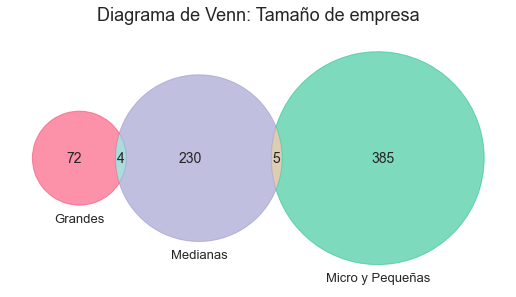

In [45]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(9,9))
    
    
set1 = set(base2.loc[base2['tamanio_empresa2']=='MI-PE']['idpersona'])
set2 = set(base2.loc[base2['tamanio_empresa2']=='ME']['idpersona'])
set3 =  set(base2.loc[base2['tamanio_empresa2']=='GE']['idpersona'])
v = venn3([set1, set2, set3],
          set_labels =  ('Micro y Pequeñas', 'Medianas', 'Grandes'), 
         alpha=0.6)
v.get_patch_by_id('001').set_color('#f94a71')
v.get_patch_by_id('100').set_color('#27c290')
v.get_patch_by_id('010').set_color('#9995cb')
for text in v.set_labels:
   text.set_fontsize(13)

plt.title("Diagrama de Venn: Tamaño de empresa")
plt.show()

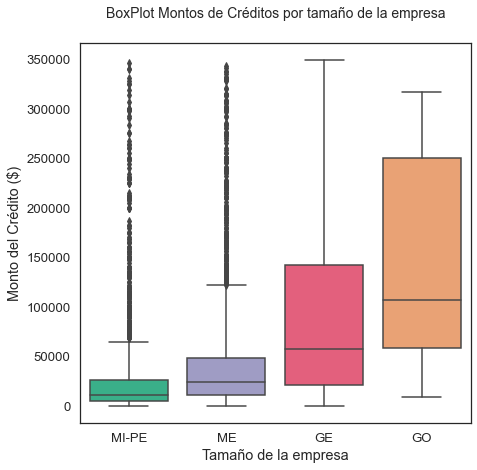

In [134]:
sns.set(style='white', font_scale=1.2)
plt.figure(figsize=(7,7))
sns.set_palette('Set2')

sns.boxplot(data=base2.loc[(base2['monto']<base2['monto'].quantile(.95)) &
                           (base2['tamanio_empresa2']!='')],
            x='tamanio_empresa2', y='monto', whis=2,palette=tamanio1,
            order=['MI-PE', 'ME', 'GE', 'GO'])

plt.title('BoxPlot Montos de Créditos por tamaño de la empresa', 
          y=1.05, fontsize = 14)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')
plt.show()

In [47]:
base.columns

Index(['idpersona', 'referencia_unica', 'id_acreedor', 'periodo_informacion',
       'periodo_infor', 'idtipo_persona', 'sexo', 'fecha_nacimiento',
       'tamanio_empresa', 'sector_empresa', 'monto', 'saldo', 'plazo',
       'fecha_otorgamiento', 'fecha_cancelacion', 'saldo_mora', 'cuota',
       'dias_mora', 'fech_ismc', 'fech_ismi', 'tasa_interes', 'datasources',
       'tipo_credito', 'tipo_prestamo', 'estado_credito', 'tipo_garantia',
       'calificacion_riesgo', 'codi_dest', 'otorgante_publico_privado',
       'tipo_entidad', 'ubicacion_geogrfica', 'ID_UNICO_CRED_str', 'year',
       'month', 'fecha_vencimiento', 'fecha_otorgamiento_td', 'fecha_mora',
       'n', 'mora', 'mora_id', 'cuenta_meses', 'agno_otor', 'lgmonto',
       'tasa_inte', 'tasa_inte2', 'fecha_otorgamiento_1', 'base_tasa', 'mujer',
       'empresa', 'tamano', 'sin_tamanio', 'datasource', 'tipocred',
       'tipopres', 'riesgo', 'otorgante', 'regul', 'entidad', 'lnmonto',
       'lnsaldo', 'lncuota', 'lnsaldo_mo

In [48]:
base2['tamanio_empresa'].value_counts()

      48056
ME     5049
PE     2708
GE     1985
MI      194
GO       92
Name: tamanio_empresa, dtype: int64

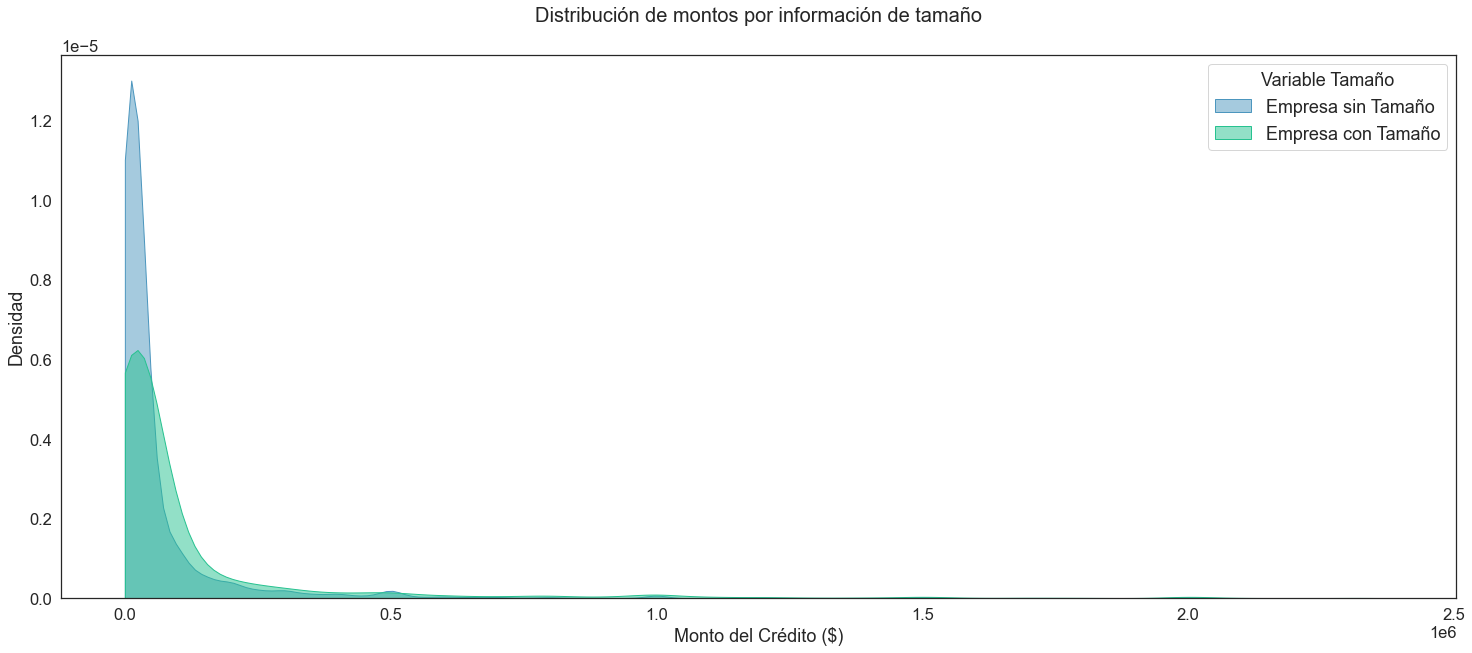

In [49]:
plt.rcParams["figure.figsize"]=25,10
sns.set(style="white", font_scale=1.5)
sns.kdeplot(data= base2.loc[(base2['tamanio_empresa']=='')], x='monto', 
            cut=0, fill=True, common_norm=False, 
            alpha=0.5, color='#4C96BE', label='Empresa sin Tamaño')



sns.kdeplot(data= base2.loc[(base2['tamanio_empresa']!='')], x='monto', cut=0, fill=True, common_norm=False, 
            alpha=0.5, color='#27c290', label='Empresa con Tamaño')
plt.legend(title='Variable Tamaño', fontsize = 18)
plt.title('Distribución de montos por información de tamaño', y=1.05, fontsize = 20)
plt.xlabel('Monto del Crédito ($)')
plt.ylabel('Densidad')
plt.show()


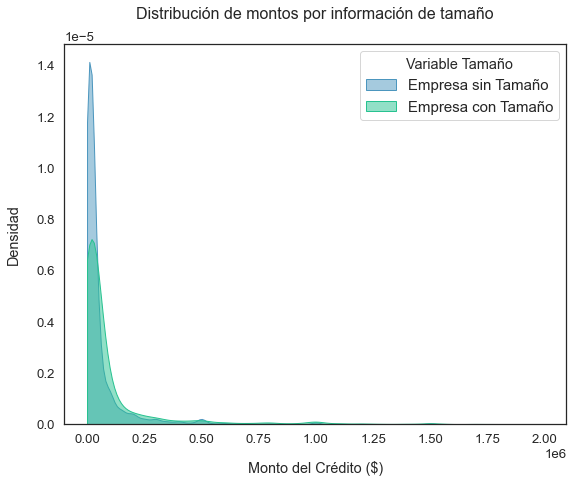

In [50]:

plt.rcParams["figure.figsize"]=9,7
sns.set(style="white", font_scale=1.2)
sns.kdeplot(data= base2.loc[(base2['monto']<base2['monto'].quantile(.999)) & 
                           (base2['tamanio_empresa']=='')], x='monto', cut=0, fill=True, common_norm=False, 
            alpha=0.5, color='#4C96BE', label='Empresa sin Tamaño')
sns.kdeplot(data= base2.loc[(base2['monto']<base2['monto'].quantile(.999)) & 
                           (base2['tamanio_empresa']!='')], x='monto', cut=0, fill=True, common_norm=False, 
            alpha=0.5, color='#27c290', label='Empresa con Tamaño')
plt.legend(title='Variable Tamaño', fontsize = 15)
plt.title('Distribución de montos por información de tamaño', y=1.05, fontsize = 16)
plt.xlabel('Monto del Crédito ($)', labelpad=15)
plt.ylabel('Densidad', labelpad=15)
plt.show()



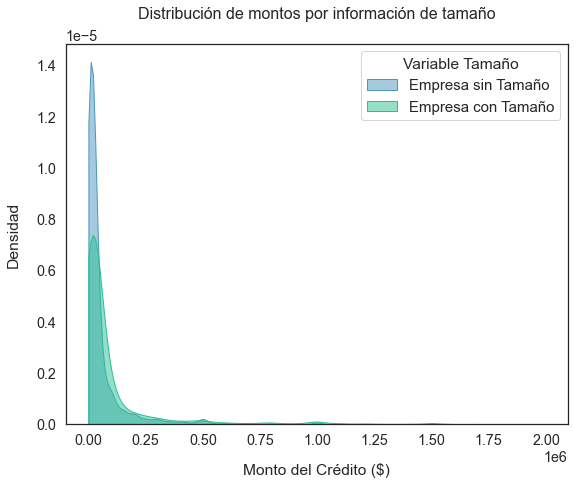

In [51]:
plt.rcParams["figure.figsize"]=9,7
sns.set(style="white", font_scale=1.3)
sns.kdeplot(data= base2.loc[(base2['monto']<base2['monto'].quantile(.999)) & 
                           (base2['tamanio_empresa']=='')], x='monto', 
            cut=0, fill=True, common_norm=False, 
            alpha=0.5, color='#4C96BE', label='Empresa sin Tamaño')
sns.kdeplot(data= base2.loc[(base2['monto']<base2['monto'].quantile(.999)) & 
                           (base2['tamanio_empresa']!='') & (base2['tamanio_empresa']!='GO')], 
            x='monto', cut=0, fill=True, common_norm=False, 
            alpha=0.5, color='#27c290', label='Empresa con Tamaño')
plt.legend(title='Variable Tamaño', fontsize = 15)
plt.title('Distribución de montos por información de tamaño', y=1.05, fontsize = 16)
plt.xlabel('Monto del Crédito ($)', labelpad=15)
plt.ylabel('Densidad', labelpad=15)
plt.show()


Descripción base de datos con y sin tamaño empresa. 
Siempre hay que filtrar por id tipo persona

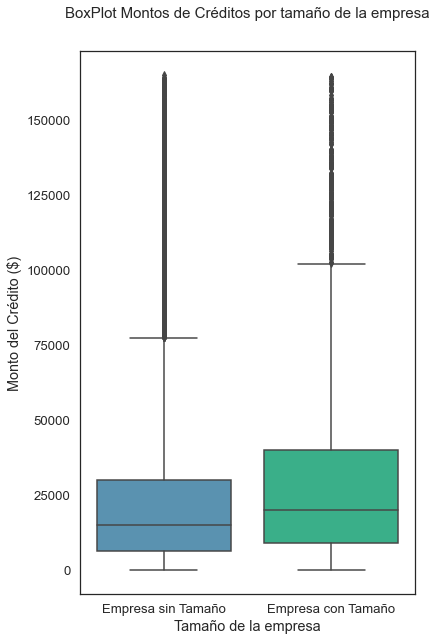

In [52]:
plt.rcParams["figure.figsize"]=6,10
sns.set(style='white', font_scale=1.2)
sns.boxplot(data=base2.loc[(base2['monto']<base2['monto'].quantile(.9))]
            ,x='tamanio_miss', y='monto', whis=2, palette=miss)

plt.title('BoxPlot Montos de Créditos por tamaño de la empresa', y=1.05, fontsize = 15)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')
plt.show()

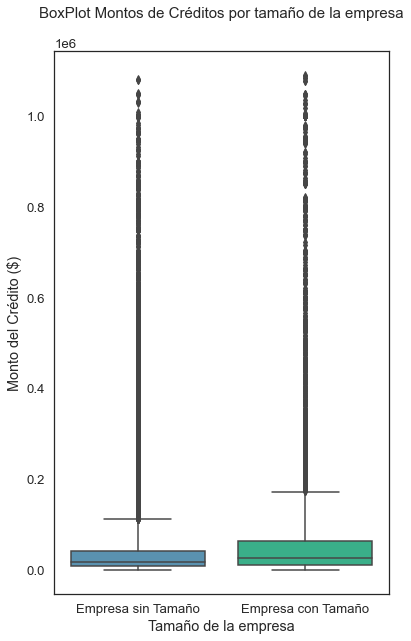

In [53]:
plt.rcParams["figure.figsize"]=6,10
sns.set(style='white', font_scale=1.2)
sns.boxplot(data=base2.loc[(base2['monto']<base2['monto'].quantile(.99))]
            ,x='tamanio_miss', y='monto', whis=2, palette=miss)

plt.title('BoxPlot Montos de Créditos por tamaño de la empresa', y=1.05, fontsize = 15)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')
plt.show()

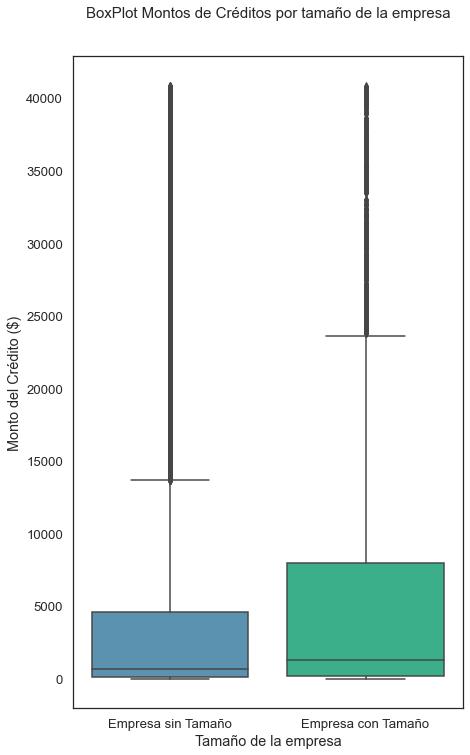

In [54]:
plt.rcParams["figure.figsize"]=7,12
sns.set(style='white', font_scale=1.2)
sns.boxplot(data=base2.loc[(base2['cuota']<base2['cuota'].quantile(.9))]
            ,x='tamanio_miss', y='cuota', whis=2, palette=miss)

plt.title('BoxPlot Montos de Créditos por tamaño de la empresa', y=1.05, 
          fontsize = 15)
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Monto del Crédito ($)')
plt.show()

Diferencias de medias entre ambas poblaciones

In [129]:
sin_tamanio = base2.loc[(base2['idtipo_persona']==2) &
                      (base2['tamanio_miss']=='Empresa sin Tamaño')]
con_tamanio = base2.loc[(base2['idtipo_persona']==2) &
                      (base2['tamanio_miss']=='Empresa con Tamaño')]

In [176]:
con_tamanio['tipo_credito'].value_counts()

Produccion            6705
Comercial             2307
Tarjeta de Credito    1013
Consumo                  3
Name: tipo_credito, dtype: int64

In [177]:
con_tamanio['tipo_prestamo'].value_counts()

CREDITO ROTATIVO        4345
DECRECIENTE NO ROT.     2329
CREDITO DECRECIENTE     1710
TARJETA DE CREDITO      1013
                         318
SOBREGIRO AUTORIZADO     252
FACTORAJE                 60
SOBREGIRO OCASIONAL        1
Name: tipo_prestamo, dtype: int64

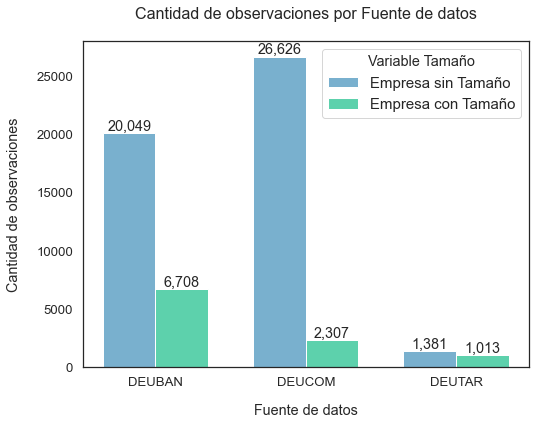

In [130]:
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"]=8,8

sns.set(style="white", font_scale=1.2)
graph = sns.histplot(data=base2, 
    x ='datasources',
    hue='tamanio_miss',
    multiple="dodge", 
    shrink = 0.7, common_norm=False, palette=miss, ax=ax1)

legend = ax1.get_legend()
handles = legend.legendHandles
plt.title('Cantidad de observaciones por Fuente de datos', y=1.05, fontsize = 16)
plt.xlabel('Fuente de datos',  labelpad=15)
plt.ylabel('Cantidad de observaciones', labelpad=15)

container0 = graph.containers[0]
container1 = graph.containers[1]
plt.bar_label(container0, labels=[f'{x:,.0f}' for x in container0.datavalues])
plt.bar_label(container1, labels=[f'{x:,.0f}' for x in container1.datavalues])
plt.legend(handles, ['Empresa sin Tamaño', 'Empresa con Tamaño'], 
           title='Variable Tamaño', fontsize = 15)
plt.show()

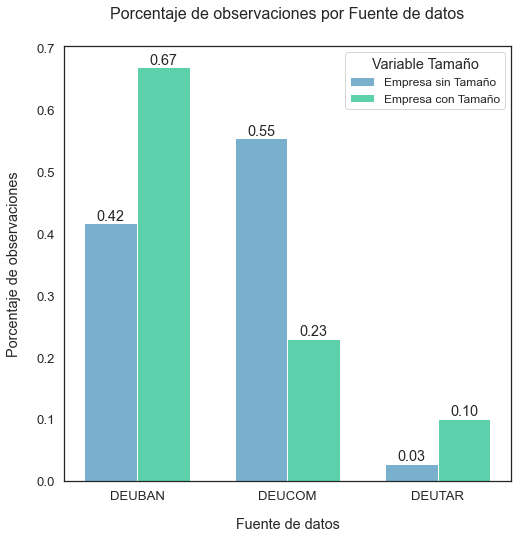

In [131]:
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"]=8,8

sns.set(style="white", font_scale=1.2)
graph = sns.histplot(data= base2,
    x ='datasources',
    hue='tamanio_miss',
    multiple="dodge", stat = 'density', 
    shrink = 0.7, common_norm=False, palette=miss, ax=ax1)

legend = ax1.get_legend()
handles = legend.legendHandles
plt.title('Porcentaje de observaciones por Fuente de datos', y=1.05, fontsize = 16)
plt.xlabel('Fuente de datos',  labelpad=15)
plt.ylabel('Porcentaje de observaciones', labelpad=15)

container0 = graph.containers[0]
container1 = graph.containers[1]
plt.bar_label(container0, labels=[f'{x:,.2f}' for x in container0.datavalues])
plt.bar_label(container1, labels=[f'{x:,.2f}' for x in container1.datavalues])
plt.legend(handles, ['Empresa sin Tamaño', 'Empresa con Tamaño'], 
           title='Variable Tamaño', fontsize = 12)
plt.show()

In [56]:
pd.crosstab(base2.tipo_prestamo.fillna('Missing'), 
            base2.tamanio_miss.fillna('Missing'))

tamanio_miss,Empresa con Tamaño,Empresa sin Tamaño
tipo_prestamo,,
,318,3953
CRED. INTERBANCARIO,0,1
CREDITO DECRECIENTE,1710,4880
CREDITO ROTATIVO,4345,10251
CREDITO TESORERIA,0,1
DECRECIENTE NO ROT.,2329,26699
FACTORAJE,60,340
SOBREGIRO AUTORIZADO,252,546
SOBREGIRO OCASIONAL,1,4


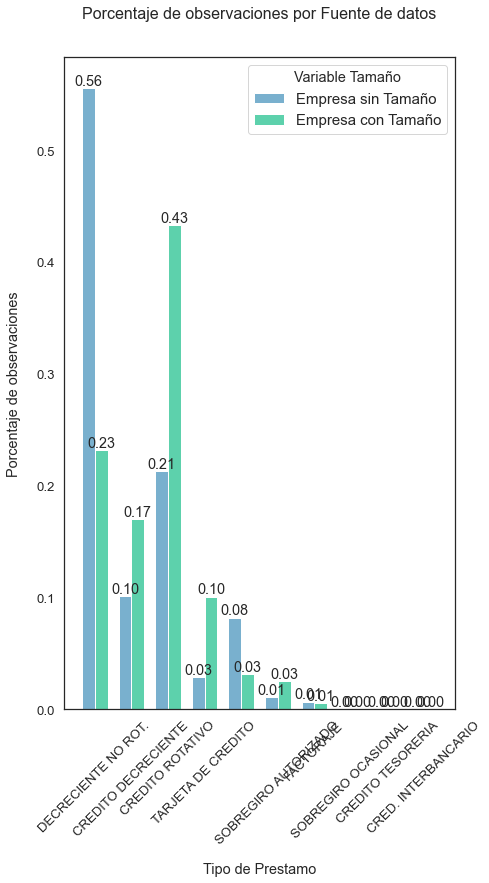

In [57]:
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"]=13,5

sns.set(style="white", font_scale=1.2)
graph = sns.histplot( data=base2,
    x ='tipo_prestamo',
    hue='tamanio_miss',
    multiple="dodge", stat = 'density', 
    shrink = 0.7, common_norm=False, palette=miss, ax=ax1)

legend = ax1.get_legend()
handles = legend.legendHandles
plt.title('Porcentaje de observaciones por Fuente de datos', 
          y=1.05, fontsize = 16)
plt.xlabel('Tipo de Prestamo',  labelpad=15)
plt.ylabel('Porcentaje de observaciones', labelpad=15)

container0 = graph.containers[0]
container1 = graph.containers[1]
plt.bar_label(container0, labels=[f'{x:,.2f}' for x in container0.datavalues])
plt.bar_label(container1, labels=[f'{x:,.2f}' for x in container1.datavalues])
plt.legend(handles, ['Empresa sin Tamaño', 'Empresa con Tamaño'], 
           title='Variable Tamaño', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

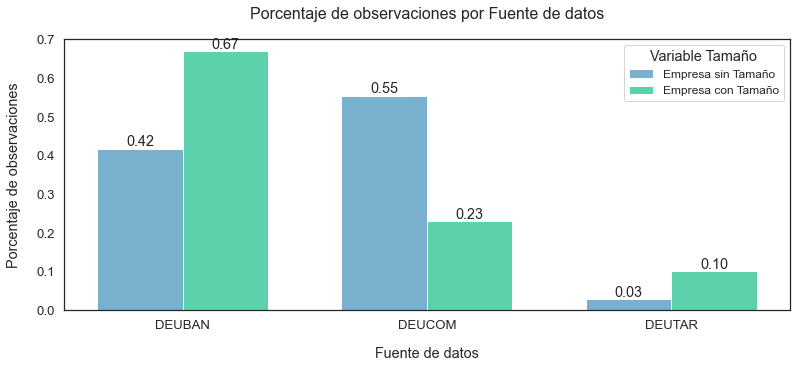

In [58]:
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"]=8,6

sns.set(style="white", font_scale=1.2)
graph = sns.histplot(data=base2,
    x ='datasources',
    hue='tamanio_miss',
    multiple="dodge", stat = 'density', 
    shrink = 0.7, common_norm=False, palette=miss, ax=ax1)

legend = ax1.get_legend()
handles = legend.legendHandles
plt.title('Porcentaje de observaciones por Fuente de datos', 
          y=1.05, fontsize = 16)
plt.xlabel('Fuente de datos',  labelpad=15)
plt.ylabel('Porcentaje de observaciones', labelpad=15)

container0 = graph.containers[0]
container1 = graph.containers[1]
plt.bar_label(container0, 
              labels=[f'{x:,.2f}' for x in container0.datavalues])
plt.bar_label(container1, 
              labels=[f'{x:,.2f}' for x in container1.datavalues])
plt.legend(handles, ['Empresa sin Tamaño', 'Empresa con Tamaño'], 
           title='Variable Tamaño', fontsize = 12)
plt.show()

In [59]:
data = base2[['tamanio_empresa','tamanio_empresa2', 'monto', 'saldo', 'plazo','saldo_mora', 'cuota',
             'dias_mora', 'datasources','tipo_credito', 'tipo_prestamo',
             'mora_id', 'agno_otor','tasa_inte']]

In [60]:
print('Hay '+ str(len(data)) + ' datos asociados a las empresas')

Hay 58084 datos asociados a las empresas


In [61]:
data.isnull().sum()

tamanio_empresa         0
tamanio_empresa2        0
monto                   0
saldo                   0
plazo                   0
saldo_mora              0
cuota                   0
dias_mora               0
datasources             0
tipo_credito            0
tipo_prestamo           0
mora_id                 0
agno_otor               2
tasa_inte           55338
dtype: int64

In [62]:
data['tasa_inte'].notnull().sum()

2746

In [63]:
print('Tenemos '+ str(len(data.loc[data.tasa_inte.isnull()])) + ' casos sin tasa de interés')
print('y  '+ str(len(data.loc[data.tasa_inte.notnull()])) + ' casos con tasa de interés')
counts = data.loc[data.tasa_inte.isnull()]['datasources'].value_counts()
percs = data.loc[data.tasa_inte.isnull()]['datasources'].value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

Tenemos 55338 casos sin tasa de interés
y  2746 casos con tasa de interés


,count,percentage
DEUCOM,28666,0.52
DEUBAN,24287,0.44
DEUTAR,2385,0.04


* Genero una variable llamada sin_tasa para capturar el efecto de no tener esa información en la predicción.
* Elimino dos casos de datos sin año de otorgamiento

In [64]:
data.tasa_inte.fillna(0, inplace=True)
data['sin_tasa'] = np.where(data['tasa_inte']==0,1, 0)
data = data.loc[data['agno_otor'].notnull()]

#### Las variables categorias las transformo en una nueva base llamada data_cat

In [65]:
len(data.loc[data['tamanio_empresa']==''])

48054

In [66]:
montos = ['monto','saldo', 'cuota', 'saldo_mora']
for col in montos: 
    data[str(col)] = data[str(col)].apply(lambda x: np.nan if x < 0 else x)
    data['ln'+str(col)] = np.log(data[str(col)]).replace(0, np.nan)


In [67]:
data.tamanio_empresa.value_counts()

      48054
ME     5049
PE     2708
GE     1985
MI      194
GO       92
Name: tamanio_empresa, dtype: int64

Dado que el dato "GO" es empresas asociadas con el gobierno que pueden ser de diversos tamaños, lo elimino del modelo. 

In [84]:
data_modelo = data.loc[(data['tamanio_empresa']!='') & (data['tamanio_empresa'].notnull())]
data_modelo = data_modelo.loc[(data_modelo['tamanio_empresa']!='GO')]
data_modelo = data_modelo.loc[(data_modelo['tipo_credito']!='Consumo')]
data_modelo = data_modelo.loc[(data_modelo['tipo_prestamo']!='SOBREGIRO OCASIONAL')]


In [85]:
data_modelo = data_modelo.apply(lambda x: x.replace({'MI':0,'PE':0,'ME':1, 'GE':2}, regex=True))

In [86]:
print(pd.unique(data_modelo['tamanio_empresa']))
print(data_modelo.tamanio_empresa.value_counts())
print(data_modelo['datasources'].value_counts())
print(data_modelo.isna().sum())

[1 0 2]
1    5048
0    2899
2    1985
Name: tamanio_empresa, dtype: int64
DEUBAN    6680
DEUCOM    2239
DEUTAR    1013
Name: datasources, dtype: int64
tamanio_empresa     0
tamanio_empresa2    0
monto               0
saldo               0
plazo               0
saldo_mora          0
cuota               0
dias_mora           0
datasources         0
tipo_credito        0
tipo_prestamo       0
mora_id             0
agno_otor           0
tasa_inte           0
sin_tasa            0
lnmonto             0
lnsaldo             0
lncuota             2
lnsaldo_mora        0
dtype: int64


Todos los créditos DEUTAR son Prestamos de tarjetas de crédito, por lo tanto elimino la variabla asociada a la dummier de tarjeta.

In [87]:
pd.crosstab(data_modelo.tipo_prestamo, data_modelo.datasources)

datasources,DEUBAN,DEUCOM,DEUTAR
tipo_prestamo,,,
,298,20,0
CREDITO DECRECIENTE,1683,0,0
CREDITO ROTATIVO,4345,0,0
DECRECIENTE NO ROT.,42,2219,0
FACTORAJE,60,0,0
SOBREGIRO AUTORIZADO,252,0,0
TARJETA DE CREDITO,0,0,1013


In [88]:
pd.crosstab(data_modelo.tipo_credito, data_modelo.datasources)

datasources,DEUBAN,DEUCOM,DEUTAR
tipo_credito,,,
Comercial,0,2239,0
Produccion,6680,0,0
Tarjeta de Credito,0,0,1013


In [89]:
data_modelo.describe()

,tamanio_empresa,tamanio_empresa2,monto,saldo,plazo,saldo_mora,cuota,dias_mora,mora_id,agno_otor,tasa_inte,sin_tasa,lnmonto,lnsaldo,lncuota,lnsaldo_mora
count,"9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,932.00","9,930.00","9,932.00"
mean,0.91,0.91,"118,067.04","85,381.49",29.17,676.54,"47,306.42",20.51,0.08,"2,018.28",0.71,0.92,10.16,-inf,-inf,-inf
std,0.70,0.70,"287,533.62","240,680.58",40.59,"8,145.74","193,524.98",178.82,0.28,2.47,2.80,0.26,1.80,NaN,NaN,NaN
min,0.00,0.00,60.40,0.00,1.00,0.00,0.00,0.00,0.00,"1,998.00",0.00,0.00,4.10,-inf,-inf,-inf
25%,0.00,0.00,"10,000.00",199.65,6.00,0.00,278.64,0.00,0.00,"2,018.00",0.00,1.00,9.21,5.30,5.63,NaN
50%,1.00,1.00,"25,000.00","11,269.14",6.00,0.00,"2,635.21",0.00,0.00,"2,019.00",0.00,1.00,10.13,9.33,7.88,NaN
75%,1.00,1.00,"71,774.33","45,074.73",48.00,0.00,"20,000.00",0.00,0.00,"2,020.00",0.00,1.00,11.18,10.72,9.90,NaN
max,2.00,2.00,"2,367,831.25","2,342,021.75",300.00,"270,000.00","6,448,470.50","3,125.00",1.00,"2,021.00",41.51,1.00,14.68,14.67,15.68,12.51


In [90]:
data_modelo.columns
data_modelo = data_modelo.drop(['monto','saldo', 'cuota', 'saldo_mora', 'tamanio_empresa2'], axis=1)

In [91]:
data_modelo['tipo_credito'].value_counts()

Produccion            6680
Comercial             2239
Tarjeta de Credito    1013
Name: tipo_credito, dtype: int64

In [92]:
data_modelo = data_modelo.loc[(data_modelo['tipo_credito']!='Consumo')]

In [93]:
data_modelo['tipo_prestamo'].value_counts()

CREDITO ROTATIVO        4345
DECRECIENTE NO ROT.     2261
CREDITO DECRECIENTE     1683
TARJETA DE CREDITO      1013
                         318
SOBREGIRO AUTORIZADO     252
FACTORAJE                 60
Name: tipo_prestamo, dtype: int64

In [94]:
data_modelo['tamanio_empresa'].value_counts()

1    5048
0    2899
2    1985
Name: tamanio_empresa, dtype: int64

In [95]:
data_modelo1 = pd.get_dummies(data_modelo, columns = ['datasources','tipo_credito', 'tipo_prestamo'])
data_modelo1 = data_modelo1.drop(['tipo_credito_Tarjeta de Credito'], axis=1)
data_modelo2 = pd.get_dummies(data_modelo, columns = ['datasources','tipo_credito'])
data_modelo2 = data_modelo2.drop(['tipo_prestamo'], axis=1)
data_modelo2 = data_modelo2.drop(['tipo_credito_Tarjeta de Credito'], axis=1)
data_modelo3 = pd.get_dummies(data_modelo, columns = ['datasources'])
data_modelo3 = data_modelo3.drop(['tipo_credito','tipo_prestamo'], axis=1)

In [96]:
X = data_modelo1.drop(['tamanio_empresa'], axis=1)
y = data_modelo1['tamanio_empresa']
X.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

# Training XGBoost
model = XGBClassifier()
scaler = StandardScaler()
x_trainScaled = scaler.fit_transform(X_train)
model.fit(x_trainScaled, y_train)

x_testScaled = scaler.fit_transform(X_test)
y_predict = model.predict_proba(x_testScaled)
prediccion = model.predict(x_testScaled )


print(y_predict)
print('Model 1 XGboost Report scalar')
print(metrics.classification_report(y_test, prediccion))
print(metrics.confusion_matrix(y_test, prediccion))


[[1.5843451e-01 1.5489878e-01 6.8666673e-01]
 [6.4640481e-04 8.0327064e-01 1.9608298e-01]
 [3.8237226e-01 3.6465034e-01 2.5297737e-01]
 ...
 [3.0206156e-01 6.6414291e-01 3.3795509e-02]
 [3.9256933e-01 6.0557538e-01 1.8552653e-03]
 [6.1549610e-01 3.4316620e-01 4.1337725e-02]]
Model 1 XGboost Report scalar
              precision    recall  f1-score   support

           0       0.68      0.58      0.63       585
           1       0.69      0.80      0.74      1001
           2       0.76      0.62      0.68       401

    accuracy                           0.70      1987
   macro avg       0.71      0.67      0.68      1987
weighted avg       0.70      0.70      0.69      1987

[[341 229  15]
 [139 798  64]
 [ 24 129 248]]


Todos los créditos DEUTAR son Prestamos de tarjetas de crédito, por lo tanto elimino la variabla asociada a la dummier de tarjeta.

In [97]:
print('Relevancia de las variables en Modelo 1')

variables1 = ['Plazo', 'Dias_mora', 'Mora_id', 'Año Otorgamiento',
       'Tasa Interés', 'Sin Tasa', 'Log(monto)', 'Log(saldo)', 'Log(cuota)',
       'Log(Saldo Mora)', 'Deuda Bancaria (DEUBAN)', 'Deuda Comercial (DEUCOM)',
       'Deuda Tarjeta (DEUTAR)', 'Crédito Comercial', 'Crédito Producción',
              'Sin Tipo Préstamo','Préstamo Crédito  Decreciente', 
              'Préstamo Crédito Rotativo','Préstamo Decreciente No Rot.', 
              'Préstamo Sobregiro Autorizado', 'tipo_prestamo_FACTORAJE',
       'Préstamo Trajeta de crédito']


Relevancia de las variables en Modelo 1


In [98]:
variables2 =  ['Plazo', 'Dias_mora', 'Mora_id', 'Año Otorgamiento',
       'Tasa Interés', 'Sin Tasa', 'Log(monto)', 'Log(saldo)', 'Log(cuota)',
       'Log(Saldo Mora)', 'Deuda Bancaria (DEUBAN)', 'Deuda Comercial (DEUCOM)',
       'Deuda Tarjeta (DEUTAR)', 'Crédito Comercial', 'Crédito Consumo',
       'Crédito Hipotecario', 'Crédito Producción']

In [99]:
data_modelo1.columns

Index(['tamanio_empresa', 'plazo', 'dias_mora', 'mora_id', 'agno_otor',
       'tasa_inte', 'sin_tasa', 'lnmonto', 'lnsaldo', 'lncuota',
       'lnsaldo_mora', 'datasources_DEUBAN', 'datasources_DEUCOM',
       'datasources_DEUTAR', 'tipo_credito_Comercial',
       'tipo_credito_Produccion', 'tipo_prestamo_',
       'tipo_prestamo_CREDITO DECRECIENTE', 'tipo_prestamo_CREDITO ROTATIVO',
       'tipo_prestamo_DECRECIENTE NO ROT.', 'tipo_prestamo_FACTORAJE',
       'tipo_prestamo_SOBREGIRO AUTORIZADO',
       'tipo_prestamo_TARJETA DE CREDITO'],
      dtype='object')

In [100]:
X = data_modelo1.drop(['tamanio_empresa'], axis=1)
y = data_modelo1['tamanio_empresa']
X.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
model1 = XGBClassifier(n_estimators=100, max_depth=8,
                       learning_rate=0.1, subsample=0.5)
train_model1 = model1.fit(X_train, y_train)
pred1 = train_model1.predict(X_test)

In [101]:
print('Model 1 XGboost Report')
print(metrics.classification_report(y_test, pred1))
print(metrics.confusion_matrix(y_test, pred1))

Model 1 XGboost Report
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       707
           1       0.72      0.76      0.74      1300
           2       0.71      0.64      0.68       476

    accuracy                           0.70      2483
   macro avg       0.69      0.67      0.68      2483
weighted avg       0.70      0.70      0.70      2483

[[437 246  24]
 [209 992  99]
 [ 22 148 306]]


In [102]:
X.columns

Index(['plazo', 'dias_mora', 'mora_id', 'agno_otor', 'tasa_inte', 'sin_tasa',
       'lnmonto', 'lnsaldo', 'lncuota', 'lnsaldo_mora', 'datasources_DEUBAN',
       'datasources_DEUCOM', 'datasources_DEUTAR', 'tipo_credito_Comercial',
       'tipo_credito_Produccion', 'tipo_prestamo_',
       'tipo_prestamo_CREDITO DECRECIENTE', 'tipo_prestamo_CREDITO ROTATIVO',
       'tipo_prestamo_DECRECIENTE NO ROT.', 'tipo_prestamo_FACTORAJE',
       'tipo_prestamo_SOBREGIRO AUTORIZADO',
       'tipo_prestamo_TARJETA DE CREDITO'],
      dtype='object')

In [103]:
feature_xgb1 = pd.Series(train_model1.feature_importances_, 
                         index=variables1).sort_values(ascending=False)
feature_xgb1 = feature_xgb1.nlargest(10)

print(feature_xgb1.index)

Index(['Sin Tipo Préstamo', 'Deuda Bancaria (DEUBAN)',
       'Préstamo Crédito Rotativo', 'Log(monto)', 'Deuda Comercial (DEUCOM)',
       'Plazo', 'Préstamo Crédito  Decreciente',
       'Préstamo Decreciente No Rot.', 'Deuda Tarjeta (DEUTAR)',
       'Préstamo Sobregiro Autorizado'],
      dtype='object')


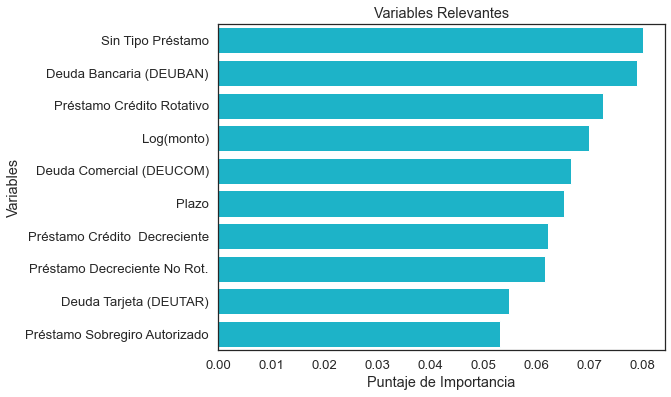

In [104]:
sns.set(font_scale=1.2, style='white')
sns.barplot(x=feature_xgb1, y=feature_xgb1.index, color='#00c9e5')

# Add labels to your graph
plt.xlabel('Puntaje de Importancia')
plt.ylabel('Variables')
plt.title('Variables Relevantes')
plt.show()

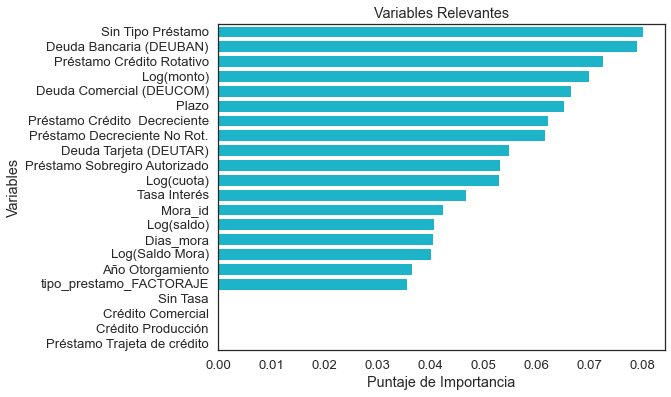

In [105]:
feature_xgb22 = pd.Series(train_model1.feature_importances_, 
                         index=variables1).sort_values(ascending=False)
feature_xgb22 = feature_xgb22.nlargest(22)
sns.set(font_scale=1.2, style='white')
sns.barplot(x=feature_xgb22, y=feature_xgb22.index, color='#00c9e5')

# Add labels to your graph
plt.xlabel('Puntaje de Importancia')
plt.ylabel('Variables')
plt.title('Variables Relevantes')
plt.show()

In [106]:
data_modelo_1 = data_modelo1.drop(['sin_tasa', 'tipo_credito_Comercial', 
                                  'tipo_credito_Produccion', 'tipo_prestamo_TARJETA DE CREDITO'], axis=1)



In [117]:
X = data_modelo_1.drop(['tamanio_empresa'], axis=1)
y = data_modelo_1['tamanio_empresa']
X.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=123)
model1 = XGBClassifier(n_estimators=200, max_depth=8,
                       learning_rate=0.1, subsample=0.5)
train_model1 = model1.fit(X_train, y_train)
pred1 = train_model1.predict(X_test)

print('Model 1 XGboost Report')
print(metrics.classification_report(y_test, pred1))
print(metrics.confusion_matrix(y_test, pred1))



Model 1 XGboost Report
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       734
           1       0.72      0.76      0.74      1251
           2       0.74      0.67      0.70       498

    accuracy                           0.70      2483
   macro avg       0.70      0.69      0.70      2483
weighted avg       0.70      0.70      0.70      2483

[[470 240  24]
 [213 945  93]
 [ 31 135 332]]


In [118]:
X = data_modelo_1.drop(['tamanio_empresa'], axis=1)
y = data_modelo_1['tamanio_empresa']
X.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123)
model1 = XGBClassifier(n_estimators=100, max_depth=8,
                       learning_rate=0.1, subsample=0.45)
train_model1 = model1.fit(X_train, y_train)
pred1 = train_model1.predict(X_test)

print('Model 1 XGboost Report')
print(metrics.classification_report(y_test, pred1))
print(metrics.confusion_matrix(y_test, pred1))



Model 1 XGboost Report
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       585
           1       0.71      0.77      0.74      1001
           2       0.76      0.65      0.70       401

    accuracy                           0.71      1987
   macro avg       0.71      0.69      0.70      1987
weighted avg       0.71      0.71      0.71      1987

[[372 199  14]
 [157 774  70]
 [ 26 115 260]]


In [171]:
X = data_modelo_1.drop(['tamanio_empresa'], axis=1)
y = data_modelo_1['tamanio_empresa']
X.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123)
model1 = XGBClassifier(n_estimators=120, max_depth=8,
                       learning_rate=0.1, subsample=0.5)
train_model1 = model1.fit(X_train, y_train)
pred1 = train_model1.predict(X_test)

print('Model 1 XGboost Report')
print(metrics.classification_report(y_test, pred1))
print(metrics.confusion_matrix(y_test, pred1))


Model 1 XGboost Report
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       585
           1       0.72      0.78      0.75      1001
           2       0.75      0.66      0.70       401

    accuracy                           0.71      1987
   macro avg       0.72      0.69      0.70      1987
weighted avg       0.71      0.71      0.71      1987

[[370 201  14]
 [148 780  73]
 [ 27 109 265]]


In [168]:
train_model1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [162]:
variables_ = ['Plazo', 'Dias_mora', 'Mora_id', 'Año Otorgamiento',
       'Tasa Interés',  'Log(monto)', 'Log(saldo)', 'Log(cuota)',
       'Log(Saldo Mora)', 'Deuda Bancaria (DEUBAN)', 'Deuda Comercial (DEUCOM)',
       'Deuda Tarjeta (DEUTAR)','Sin Tipo Préstamo','Préstamo Crédito  Decreciente', 
              'Préstamo Crédito Rotativo','Préstamo Decreciente No Rot.', 
              'tipo_prestamo_FACTORAJE',
              'Préstamo Sobregiro Autorizado']


In [173]:
len(variables_)

18

In [163]:
feature_xgb1 = pd.Series(train_model1.feature_importances_, 
                         index=variables_).sort_values(ascending=False)
feature_xgb1 = feature_xgb1.nlargest(10)

print(feature_xgb1.index)

Index(['Sin Tipo Préstamo', 'Deuda Bancaria (DEUBAN)',
       'Deuda Comercial (DEUCOM)', 'Préstamo Crédito Rotativo', 'Log(monto)',
       'Plazo', 'tipo_prestamo_FACTORAJE', 'Préstamo Crédito  Decreciente',
       'Préstamo Decreciente No Rot.', 'Log(cuota)'],
      dtype='object')


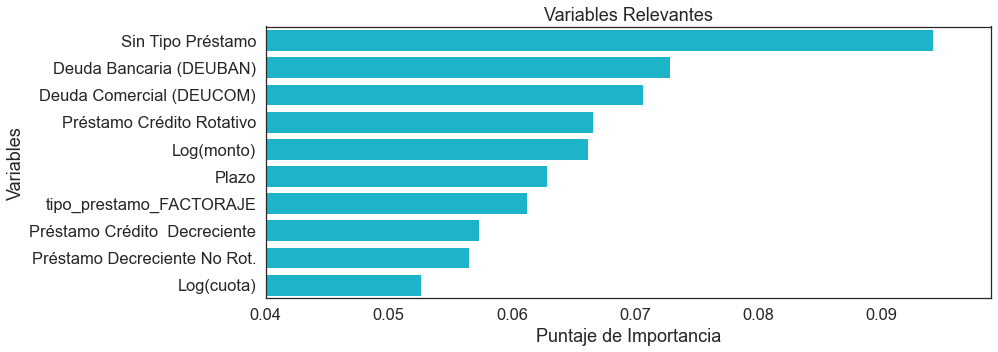

In [167]:
sns.set(font_scale=1.5, style='white')
g = sns.barplot(x=feature_xgb1, y=feature_xgb1.index, color='#00c9e5')
g.set(xlim=(0.04, None))
# Add labels to your graph
plt.xlabel('Puntaje de Importancia')
plt.ylabel('Variables')
plt.title('Variables Relevantes')
plt.show()

In [119]:
data = base.loc[(base['idtipo_persona']==2)]
data.tasa_inte.fillna(0, inplace=True)
data['sin_tasa'] = np.where(data['tasa_inte']==0,1, 0)
data = data.loc[data['agno_otor'].notnull()]

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59433 entries, 9838 to 11337344
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   idpersona                  59433 non-null  object        
 1   referencia_unica           59433 non-null  object        
 2   id_acreedor                59433 non-null  object        
 3   periodo_informacion        59433 non-null  int32         
 4   periodo_infor              59433 non-null  object        
 5   idtipo_persona             59433 non-null  int8          
 6   sexo                       59433 non-null  object        
 7   fecha_nacimiento           59433 non-null  int32         
 8   tamanio_empresa            59433 non-null  object        
 9   sector_empresa             59433 non-null  object        
 10  monto                      59433 non-null  float64       
 11  saldo                      59433 non-null  float64       
 12

In [121]:
data = data.loc[(data['tipo_credito']!='Consumo')]
data = data.loc[(data['tipo_prestamo']!='SOBREGIRO OCASIONAL')]
data = pd.get_dummies(data, columns = ['datasources','tipo_credito', 'tipo_prestamo'])
data = data.drop(['tipo_credito_Tarjeta de Credito'], axis=1)

In [124]:
data_fit= data.loc[(data['tamanio_empresa']=='') | (data['tamanio_empresa'].isnull())]
montos = ['monto','saldo', 'cuota', 'saldo_mora']
for col in montos: 
    data_fit[str(col)] = data_fit[str(col)].apply(lambda x: np.nan if x < 0 else x)
    data_fit['ln'+str(col)] = np.log(data_fit[str(col)]).replace(0, np.nan)

X_data_fit = data_fit[['plazo', 'dias_mora', 'mora_id', 'agno_otor', 'tasa_inte', 'lnmonto',
       'lnsaldo', 'lncuota', 'lnsaldo_mora', 'datasources_DEUBAN',
       'datasources_DEUCOM', 'datasources_DEUTAR', 'tipo_prestamo_',
       'tipo_prestamo_CREDITO DECRECIENTE', 'tipo_prestamo_CREDITO ROTATIVO',
       'tipo_prestamo_DECRECIENTE NO ROT.', 'tipo_prestamo_FACTORAJE',
       'tipo_prestamo_SOBREGIRO AUTORIZADO']]


In [125]:
data_fit_pred = train_model1.predict(X_data_fit)
data_fit['y_pred'] = data_fit_pred.tolist()

#data_fit_pred = pd.DataFrame(data_fit_pred, columns=['y_pred'])
#data_fit_pred['y_pred'].value_counts() 

In [139]:
data_pred= data.loc[(data['tamanio_empresa']=='') | (data['tamanio_empresa'].isnull())]


In [127]:
data_fit['y_pred'] = data_fit_pred.tolist()

In [142]:
data_fit['y_pred'].describe()

count   48,287.00
mean         0.92
std          0.58
min          0.00
25%          1.00
50%          1.00
75%          1.00
max          2.00
Name: y_pred, dtype: float64

In [143]:
data_pred= data.loc[(data['tamanio_empresa']=='') | (data['tamanio_empresa'].isnull())]
data_pred['y_pred'] = data_fit['y_pred']


In [144]:
data_pred['y_pred'].describe()

count   48,287.00
mean         0.92
std          0.58
min          0.00
25%          1.00
50%          1.00
75%          1.00
max          2.00
Name: y_pred, dtype: float64

Predicciones datos sin información

In [128]:
data_fit['y_pred'].value_counts()

1    31819
0    10234
2     6234
Name: y_pred, dtype: int64

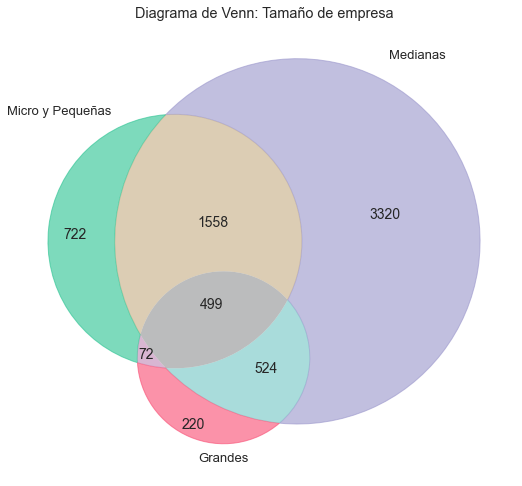

In [145]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(9,9))
    
    
set1 = set(data_pred.loc[data_pred['y_pred']==0]['idpersona'])
set2 = set(data_pred.loc[data_pred['y_pred']==1]['idpersona'])
set3 =  set(data_pred.loc[data_pred['y_pred']==2]['idpersona'])
v = venn3([set1, set2, set3],
          set_labels =  ('Micro y Pequeñas', 'Medianas', 'Grandes'), 
         alpha=0.6)
v.get_patch_by_id('001').set_color('#f94a71')
v.get_patch_by_id('100').set_color('#27c290')
v.get_patch_by_id('010').set_color('#9995cb')
for text in v.set_labels:
   text.set_fontsize(13)

plt.title("Diagrama de Venn: Tamaño de empresa")
plt.show()

In [146]:
len(set(data_pred['idpersona']))

6915

In [147]:
len(data_pred)

48287

In [151]:
id_empresas = data_pred.groupby(['idpersona'])['referencia_unica'].count()

In [157]:
id_empresas.info

<bound method Series.info of idpersona
1000165764     1
1000176729     6
1000176730    10
1000176731     3
1000176732     1
              ..
981           20
985           22
986            9
989           14
999            1
Name: referencia_unica, Length: 6915, dtype: int64>

In [158]:
id_empresas.value_counts()

1      2535
2      1314
3       683
4       491
5       295
       ... 
70        1
390       1
57        1
86        1
317       1
Name: referencia_unica, Length: 136, dtype: int64